In [1]:
# This is the data exploration stage of the project——Determinants of Hukou Reform
# The aims to generate scatterplots that show descriptive relationships between outcomes the proposed regional variabes
# The insights obtained can guide more complicated, in-depth data analysis in future

In [ ]:
import pandas as pd
import numpy as np

In [17]:
# 1. Read the data and construct the dataset for use

indep = pd.read_excel('RegionalVariables.xlsx',index_col = 0)
dep = pd.read_excel('Outcomes.xlsx', index_col = 0).iloc[:, 2:]
data = pd.merge(dep, indep, how='inner', left_index=True, right_index=True)

# 2. List all variables to be plotted and the corresponding text explanation

var = ["GDP13", "GDPgrowth_annual", "gdp/cap13", "GDP/cap_annual", "UNE13", "expgrowth_annual", "POP13", "popgrowth_5year", 
       "%mig13", "pcpmig_annual", "Gini13", "eldrate13", "%illiteracy13", "dibao13", "DBgrowth_annual"]

text = ["GDP (10000 yuan), 2013", "GDP average annual growth, 2008-2013", 
        "GDP/capita (10000 yuan), 2013", "GDP/capita average annual growth, 2008-2013",
        "Urban unemployment rate (%), 2013", "Export average annual growth, 2008-2013",
        "Population (10000 persons), 2013", "Population growth, 2008-2013",
        "Migrants proportion (%), 2013", "Average % increase of migrants proportion, 2008-2013",
        "Gini coefficient, 2013", "% of the elderly, 2013", "% of the illiterate, 2013"
        "Number of dibao receivers (10000 persons), 2013", "Average annual growth in Dibao receivers, 2008-2013"]

<IPython.core.display.Javascript object>


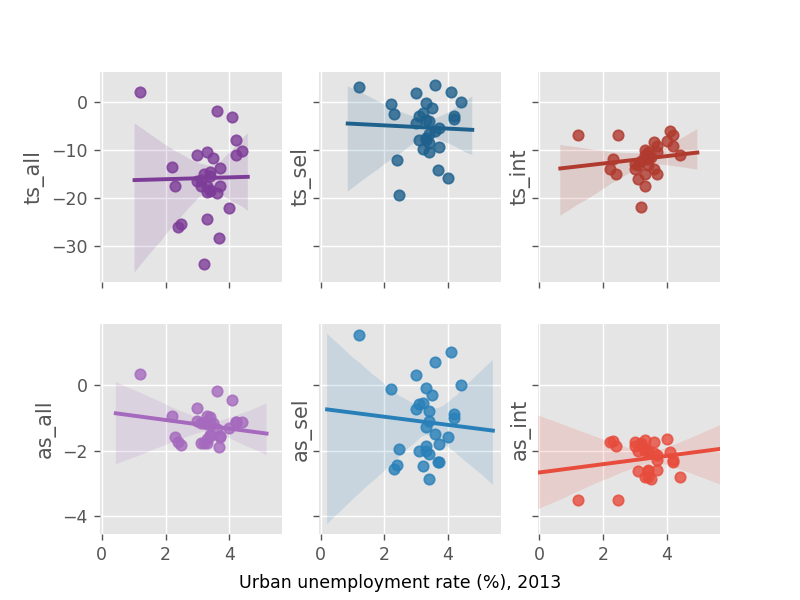

In [31]:
import matplotlib.pyplot as plt
import seaborn
plt.style.use('ggplot')
%matplotlib notebook

# 2.1 The function to draw a graph with 6 subplots

def plot6(v, text):
    
    fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, sharex='all',sharey='row')
    seaborn.regplot(data[v], data['ts_all'], color='#7D3C98', ax=ax1)
    seaborn.regplot(data[v], data['ts_sel'], color='#1F618D', ax=ax2)
    seaborn.regplot(data[v], data['ts_int'], color='#B03A2E', ax=ax3)
    seaborn.regplot(data[v], data['as_all'], color='#A569BD', ax=ax4)
    seaborn.regplot(data[v], data['as_sel'], color="#2980B9", ax=ax5)
    seaborn.regplot(data[v], data['as_int'], color='#E74C3C', ax=ax6)

    ax1.set_xlabel('')
    ax2.set_xlabel('')
    ax3.set_xlabel('')
    ax4.set_xlabel('')
    ax5.set_xlabel('')
    ax6.set_xlabel('')

    fig.text(0.5,0.02, text, ha='center',fontsize=10)
    fig.subplots_adjust(bottom=0.11)
    fig.suptitle('Scatterplots by policy scores', fontsize=10)

    axes = (ax1, ax2, ax3, ax4, ax5, ax6)
    for ax in axes:
        for spine in ['top', 'right', 'left','bottom']:
            ax.spines[spine].set_visible(False)
    #for i, province in enumerate(dep['ProvinceEng']):
        #plt.gca().annotate(province, )
        
plot6(var[4], text[4])

<IPython.core.display.Javascript object>


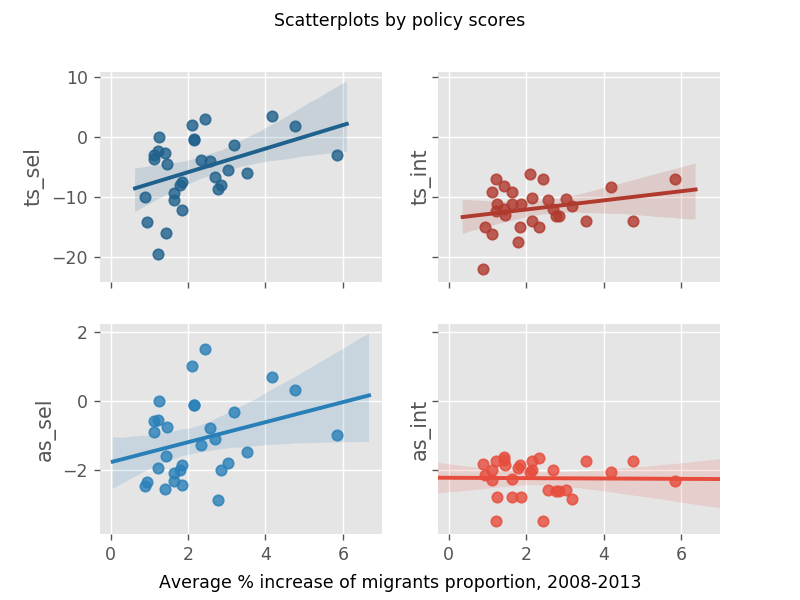

In [47]:
#2.2 4-subplots Graphs

def plot4(v, text):
    
    fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, sharex='all',sharey='row')
    seaborn.regplot(data[v], data['ts_sel'], color='#1F618D', ax=ax1)
    seaborn.regplot(data[v], data['ts_int'], color='#B03A2E', ax=ax2)
    seaborn.regplot(data[v], data['as_sel'], color="#2980B9", ax=ax3)
    seaborn.regplot(data[v], data['as_int'], color='#E74C3C', ax=ax4)

    ax1.set_xlabel('')
    ax2.set_xlabel('')
    ax3.set_xlabel('')
    ax4.set_xlabel('')

    fig.text(0.5,0.02, text, ha='center',fontsize=10)
    fig.subplots_adjust(bottom=0.11)
    fig.suptitle('Scatterplots by policy scores', fontsize=10)

    axes = (ax1, ax2, ax3, ax4)
    for ax in axes:
        for spine in ['top', 'right', 'left','bottom']:
            ax.spines[spine].set_visible(False)
            
plot4(var[9], text[9])

<IPython.core.display.Javascript object>


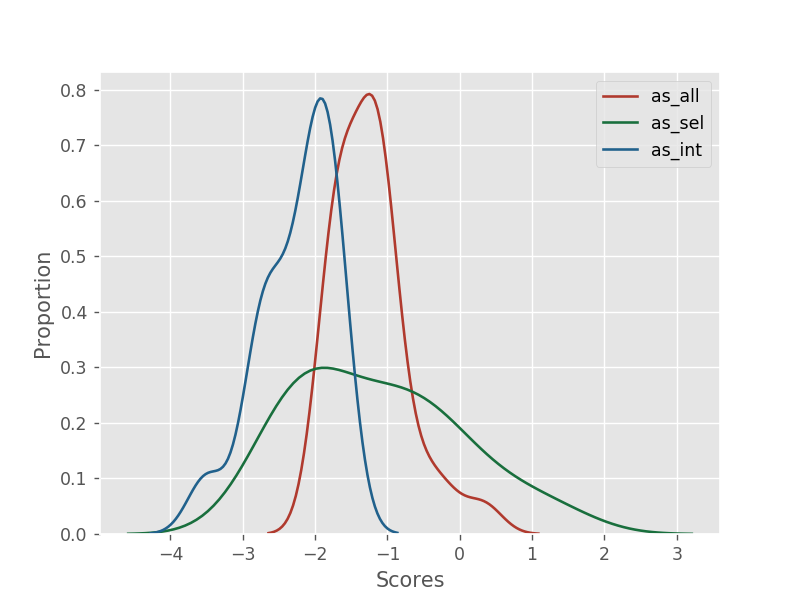

In [43]:
# 2.3 Distribution

def distribution(v1, v2, v3):
    plt.figure()
    seaborn.kdeplot(data[v1], color='#B03A2E')
    seaborn.kdeplot(data[v2], color='#196F3D')
    seaborn.kdeplot(data[v3], color='#21618C')
    
    plt.xlabel("Scores")
    plt.ylabel("Proportion")
    
distribution("as_all", "as_sel", "as_int")